## CMPINF 2100 Week 13
### Measuring CLASSIFICATION PERFORMANCE - Confusion Matrix
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

## Read Data
Read data from last week.

In [3]:
df = pd.read_csv("../week_12/week_11_intro_binary_classification.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       115 non-null    float64
 1   y       115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


## Fit the model

In [5]:
fit_glm = smf.logit(formula="y ~ x", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


## Predict the training set

In [6]:
df_copy = df.copy()

In [7]:
df_copy["pred_probability"] = fit_glm.predict(df)

In [8]:
df_copy

,x,y,pred_probability
0,-0.457429,1,0.270709
1,0.425948,1,0.513678
2,-0.784695,0,0.201258
3,-1.925209,0,0.061306
4,2.252617,1,0.901780
...,...,...,...
110,-0.791672,0,0.199933
111,0.452238,1,0.521449
112,0.535510,1,0.545976
113,-0.532739,0,0.253472


## Classify the training set

In [9]:
df_copy["pred_class"] = np.where(df_copy.pred_probability > 0.5, 1, 0)

## Accuracy
The Accuracy is the PROPORTION of CORRECT CLASSIFICATIONS!!

In [10]:
np.mean(df_copy.pred_class == df_copy.y)

0.6782608695652174

But the ACCURACY does NOT tell us HOW the model was right..ACCURACY does NOT tell us HOW the model was wrong!!

Many times we need MORE INFORMATION or DETAILS about **HOW** the classifications were RIGHT or WRONG!!!

We need to examine the ERRORS!!!

The ERRORS in BINARY CLASSIFICATION problem are typically organized in a graphical tool known as the **CONFUSION MATRIX**.

## CONFUSION MATRIX
The CONFUSION MATRIX has a special and magic sounding name. But you already know how to calculate the CONFUSION MATRIX because the CONFUSION MATRIX is nothing more than the COUNTS for the **COMBINATION** of 2 categorical variables!!

In [11]:
df_copy.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

In [12]:
df_copy.pred_class.value_counts()

pred_class
0    72
1    43
Name: count, dtype: int64

We learned about DODGED BAR CHARTS and HEAT MAPS for visualizing the COMBINATIONS between CATEGORICAL VARIBALES!!

The CONFUSION MATRIX is a HEAT MAP between the OBSERVED OUTPUT CLASS and the PREDICTED CLASS!!!

We need to first CROSS-TABULATE the observed output with the predicted class.

In [14]:
pd.crosstab(df_copy.y, df_copy.pred_class, normalize=True)

pred_class,0,1
y,,
0,0.443478,0.139130
1,0.182609,0.234783


Lets visualize the CONFUSION MATRIX as a Seaborn heatmap!!

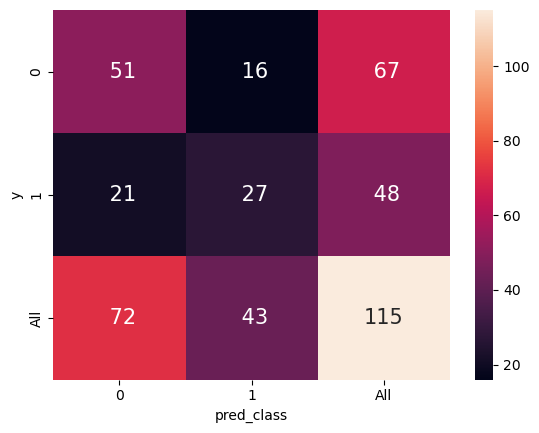

In [18]:
fig, ax = plt.subplots()

sns.heatmap(pd.crosstab(df_copy.y, df_copy.pred_class, margins=True),
            annot=True,
            annot_kws={"size": 15},
            fmt="3d",
            ax=ax)

plt.show()            

In [19]:
df_copy.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

In [20]:
df_copy.pred_class.value_counts()

pred_class
0    72
1    43
Name: count, dtype: int64

I like to use EVENT and NON-EVENT instead of the POSITIVE and NEGATIVE terms because POS sounds "good". I often work in problems where the EVENT I want to classify is a BAD THING such as a FAILURE.\
True/False = Designation (Observed)\
Positive/Negative = Model Predictions

But SKLEARN has a function that calcs the TP, TN, FP, FN counts for you.

In [21]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(df_copy.y.to_numpy(), df_copy.pred_class.to_numpy())

array([[51, 16],
       [21, 27]])

In [24]:
confusion_matrix(df_copy.y.to_numpy(), df_copy.pred_class.to_numpy()).ravel()

array([51, 16, 21, 27])

That said, there is a useful reason to use the SKLEARN function. This useful reason requires specifying or NAMING the OUTPUT.

In [25]:
TN, FP, FN, TP = confusion_matrix(df_copy.y.to_numpy(), df_copy.pred_class.to_numpy()).ravel()

In [26]:
TN

51

We can calculate ACCURACY using the CONFUSION MATRIX!

In [27]:
(TN + TP)/(TN+FP+FN+TP)

0.6782608695652174

In [28]:
np.mean(df_copy.y==df_copy.pred_class)

0.6782608695652174

We can convert the CONFUSION MATRIX counts to PROPORTIONS as well!

Theses PROPORTIONS change the question about what is ACCURATE relative to!!!

So, ACCURACY does NOT care HOW the model is accurate.

What if we wanted to know the accuracy WHEN THE EVENT is observed!!!

In [29]:
FN+TP

48

In [30]:
df_copy.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

The TRUE POSITIVE RATE (TPR) or **SENSITIVITY** is the PROPORTION of times the model correctly classifies the EVENT **WHEN** the EVENT is observed!!

In [31]:
TP/(TP+FN)

0.5625

Likewise, we can focus on the NON-EVENT situation. 

The TRUE NEGATIVE RATE (TNR) OR **SPECIFICITY** is the PROPORTION of times the model correctly classifies THE NON-EVENT **WHEN** THE NON-EVENT is observed!!!

In [32]:
TN/(TN+FP)

0.7611940298507462

In [33]:
TN+FP

67

Sensitivity and Specificty let you know which CLASS, EVENT or NON-EVENT, the MODEL is BETTER at predicting!!!!

A related statistics to the Specificity is the **FALSE POSITIVE RATE (FPR)**. The FPR is 1 minus the Specifity.

In [34]:
1 - (TN/(TN+FP))

0.23880597014925375

## Summary
The CONFUSION MATRIX provides the COUNTS for the COMBOS of the observed output and the model predicted CLASS.

The CONFUSION MATRIX has 4 cells in a BINARY CLASSIFICATION problem because there are 4 combos!!!

Those cells have import meanings:
* TRUE POSITIVE (TP): classify the EVENT and observe the EVENT - correct classification
* TRUE NEGATIVE (TN): classify the NON-EVENT and observe the NON-EVENT - correct classification
* FALSE POSITIVE (FP): classify the EVENT and observe the NON-EVENT - inccorrect classification
* FALSE NEGATIVE (FN): classify the NON-EVENT and observe the EVENT - inccorrect classification

Accuracy is the proportion of correct classifications:
(TN+TP)/(All)

Sensitivity or the TRUE POSITIVE RATE is the proportion of CLASSIFIED THE EVENT/OBSERVED THE EVENT:
* TP/(TP+FN)

Specificity or the TRUE NEGATIVE RATE is the proportion of CLASSIFIED THE NON-EVENT/OBSERVED THE NON-EVENT:
* TN/(TN+FP)

The FALSE POSITIVE RATE is the PROPORTION of INCORRECT classifications when the EVENT is NOT observed.
* 1 - Specificity